In [1]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np


In [2]:
# Models 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [3]:

# Score functions
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [5]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [16]:
#Function to create confusion matrix.
def plotCM(Y_test,Y_pred):
    print (metrics.classification_report(Y_test,Y_pred))
    print ("Confusion matrix")
    confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
    print (confusion_matrix)

# Plot Results: 
    width = 5
    height = 5
    plt.figure(figsize=(width, height))
    plt.imshow(
        confusion_matrix, 
        interpolation='nearest', 
        cmap=plt.cm.rainbow
    )
    plt.title("Confusion matrix - Decision Tree Classifier \n(normalised to % of total test data)")
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, LABELS, rotation=90)
    plt.yticks(tick_marks, LABELS)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [17]:
# Function to plot a correlation map
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [18]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [19]:
# Beautiful distribution of plots
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

In [39]:
pulsar_data="C:/practice data/HTRU_2.csv"
data = pd.read_csv(pulsar_data)

In [40]:
data.head()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,C
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [42]:
data.describe()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,C
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [44]:
list(data.columns)

['M1', 'ST1', 'EX1', 'SK1', 'M2', 'ST2', 'EX2', 'SK2', 'C']

In [49]:
cols=list(data.columns)

In [51]:
cols = list(data.columns)
features = cols
features.remove('C')

In [53]:
X=data[features]
Y=data['C']

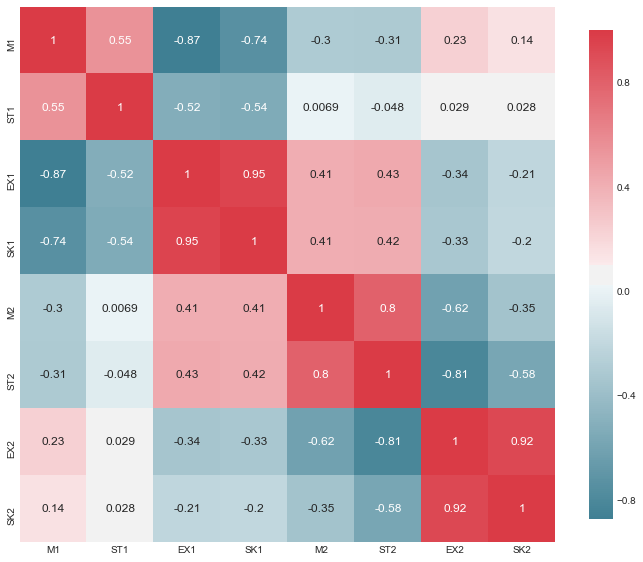

In [54]:
plot_correlation_map(X)

1.0


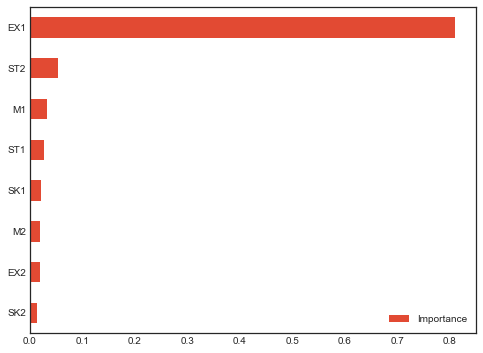

In [55]:
plot_variable_importance( X , Y )

In [56]:
X

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738


In [57]:
X = StandardScaler().fit_transform(X)

In [58]:
X

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [59]:
str(X)

'[[ 1.14931702  1.33483164 -0.66956953 ... -0.37062547 -0.07279778\n  -0.28743812]\n [-0.3341682   1.80226533 -0.01178476 ... -0.5889241   0.50442694\n   0.21158145]\n [-0.31437216 -1.05332222 -0.14523256 ... -0.23532816 -0.12599609\n  -0.39137346]\n ...\n [ 0.3218423   1.95621968 -0.2993338  ...  1.67156847 -1.28807874\n  -0.94133005]\n [ 0.13362759  1.07450972 -0.26005007 ... -0.66485697  0.37825656\n   0.27584987]\n [-2.10576204  5.73546965  0.87267394 ...  1.97154554 -2.19732744\n  -0.97105168]]'

In [60]:
# Split dataset to 60% training and 40% testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=0)

In [61]:
df = pd.DataFrame({'M1':X[:,0],'ST1':X[:,1],'EX1':X[:,2],'SK1':X[:,3],'M2':X[:,4],'ST2':X[:,5],'EX2':X[:,6],'SK2':X[:,7]})

In [62]:
df

,EX1,EX2,M1,M2,SK1,SK2,ST1,ST2
0,-0.669570,-0.072798,1.149317,-0.319440,-0.400459,-0.287438,1.334832,-0.370625
1,-0.011785,0.504427,-0.334168,-0.371102,-0.370535,0.211581,1.802265,-0.588924
2,-0.145233,-0.125996,-0.314372,-0.322107,-0.116593,-0.391373,-1.053322,-0.235328
3,-0.513409,-0.312265,1.000694,-0.304404,-0.390178,-0.481300,1.553254,-0.275666
4,0.115609,1.324026,-0.871402,-0.388010,-0.104866,1.386794,-0.858879,-0.763111
5,0.050796,0.514472,-0.682579,-0.372492,-0.219458,0.249140,0.021713,-0.605106
6,-0.419542,2.419609,0.327629,-0.394110,-0.305208,3.519795,0.323766,-0.875546
7,-0.597908,1.161993,0.752482,-0.386592,-0.223865,0.876701,-0.979903,-0.613639
8,-0.023655,0.154783,-0.149304,-0.348888,-0.259403,0.029244,0.888141,-0.608097
9,-0.011255,-0.201172,-0.148999,-0.289595,-0.098480,-0.441952,-1.030695,-0.069137


1.0


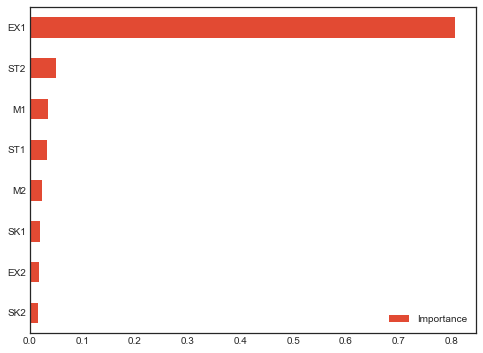

In [63]:
plot_variable_importance(df,Y)

In [65]:
print(X_train.shape,Y_train.shape)

(10738, 8) (10738,)


2579     0
17288    0
6672     0
10997    1
460      0
16489    0
1974     0
10604    0
12319    0
2754     1
9865     0
2458     0
7453     0
16019    0
16822    0
13555    0
273      0
6144     0
618      0
7811     0
7673     0
811      0
2373     0
9949     0
544      0
1432     0
1997     0
9982     0
17188    0
13399    0
        ..
17043    0
797      0
755      0
10200    0
15186    0
2496     0
7599     0
1871     0
7877     0
4851     0
5072     0
2163     0
6036     0
6921     1
6216     0
16921    0
2897     0
10327    0
17089    0
14650    0
6744     0
15832    0
15430    0
14935    0
14116    0
9225     1
13123    0
9845     0
10799    0
2732     0
Name: C, Length: 10738, dtype: int64

In [69]:
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans,AgglomerativeClustering

In [70]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension

# print(pca.components_)
print(pca.explained_variance_)

[4.13427769 2.14472493 0.80939419 0.45745038 0.25824135 0.15988824
 0.02044308 0.01602715]


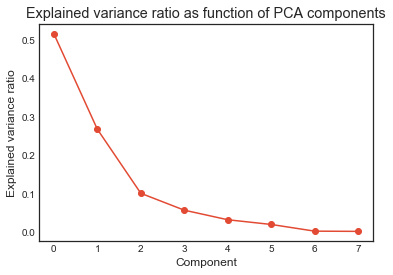

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [72]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

In [73]:
reduced_data.shape

(17898, 2)

In [74]:
kmeans = cluster.KMeans(n_clusters=2)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [79]:
reduced_data[:, 0].min()

-6.54707307535906

In [82]:
x_min, x_max = reduced_data[:,0].min() -1 , reduced_data[:,0].max() +1
y_min, y_max = reduced_data[:,1].min() -1 , reduced_data[:,1].max() +1

hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.

xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [83]:
# Find the centroids for KMeans or the cluster means for Gaussian Mixed Model

centroids = kmeans.cluster_centers_

print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7

print('*** CENTROIDS TRANSFERRED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[-0.43861262 -0.1064617 ]
 [ 6.01191215  1.45923393]]
*** CENTROIDS TRANSFERRED TO ORIGINAL SPACE ***
[[ 0.19627924  0.13893976 -0.21639243 -0.2086499  -0.12520202 -0.13567283
   0.11862305  0.0858532 ]
 [-2.69033199 -1.90439942  2.9660165   2.8598923   1.71610105  1.8596208
  -1.62592531 -1.17676028]]


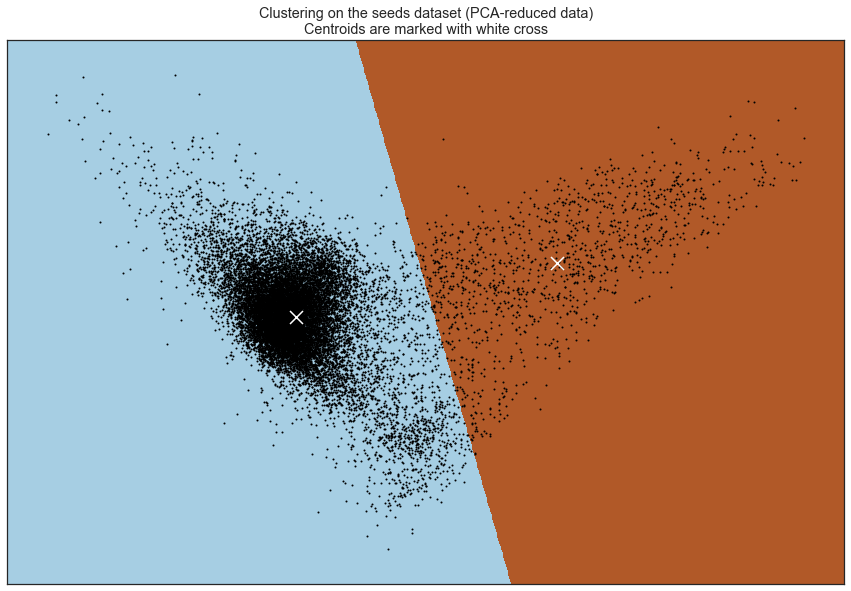

In [84]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(15,10))
plt.clf()
plt.imshow(Z, interpolation='Nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the seeds dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [85]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)


In [86]:
clf_dt= dt.fit(X_train,Y_train)
print ("Acurracy: ", clf_dt.score(X_test,Y_test))

Acurracy:  0.9701117318435755


In [87]:
# Predict clusters on testing data
Y_pred = clf_dt.predict(X_test)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      6566
          1       0.83      0.80      0.82       594

avg / total       0.97      0.97      0.97      7160

Confusion matrix
[[6468   98]
 [ 116  478]]


NameError: name 'n_classes' is not defined

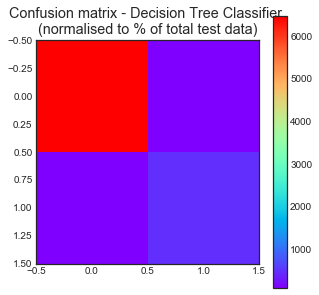

In [88]:
plotCM(Y_test, Y_pred)

In [90]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf= rf.fit(X_train,Y_train)

In [92]:
print ("Acurracy: ", clf_rf.score(X_test,Y_test))


Acurracy:  0.9801675977653631


In [95]:
Y_pred=rf.predict(X_test)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      6566
          1       0.93      0.82      0.87       594

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6529   37]
 [ 105  489]]


NameError: name 'n_classes' is not defined

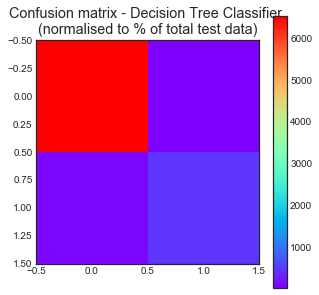

In [96]:
plotCM(Y_test,Y_pred)

In [97]:
#Naive Bayes Classifier¶
nb = BernoulliNB()

In [98]:
clf_nb=nb.fit(X_train,Y_train)
print ("Acurracy: ", clf_nb.score(X_test,Y_test))

Acurracy:  0.9497206703910615


             precision    recall  f1-score   support

          0       0.99      0.96      0.97      6566
          1       0.65      0.86      0.74       594

avg / total       0.96      0.95      0.95      7160

Confusion matrix
[[6287  279]
 [  81  513]]


NameError: name 'n_classes' is not defined

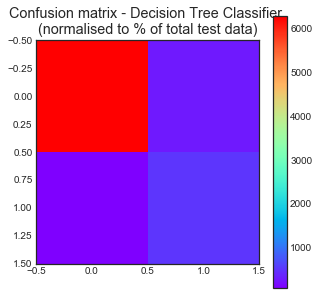

In [99]:
Y_predict = nb.predict(X_test)
plotCM(Y_test,Y_predict)

In [100]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, Y_train)
print ("Acurracy: ", clf_knn.score(X_test,Y_test) )

Acurracy:  0.9787709497206704


             precision    recall  f1-score   support

          0       0.98      0.99      0.99      6566
          1       0.92      0.81      0.86       594

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6526   40]
 [ 112  482]]


NameError: name 'n_classes' is not defined

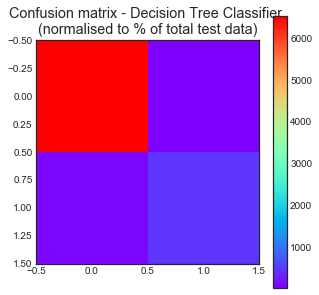

In [101]:
Y_predict = clf_knn.predict(X_test)
plotCM(Y_test,Y_predict)


In [102]:
# SVM Classifier
# SVM with a Linear Kernel


svc = SVC()
clf_svc=svc.fit(X_train, Y_train)

In [106]:
print("accuracy: ", clf_svc.score(X_test, Y_test))

accuracy:  0.979050279329609


             precision    recall  f1-score   support

          0       0.99      0.98      0.99      6648
          1       0.80      0.93      0.86       512

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6532  116]
 [  34  478]]


NameError: name 'n_classes' is not defined

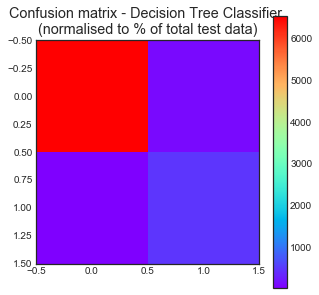

In [107]:
Y_pred = svc.predict(X_test)
plotCM(Y_pred,Y_test)


In [108]:
# SVM with multiple kernel

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import model_selection

In [ ]:
svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}

grid = model_selection.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, Y_train)

print ('Best score: %0.3f' % grid.best_score_)

print ('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid.predict(X_test)
#print (classification_report(Y_test, predictions))
plotCM(Y_test,Y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.6s finished


Best score: 0.980
Best parameters set:
	clf__C: 3
	clf__gamma: 0.3
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      6566
          1       0.93      0.80      0.86       594

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6532   34]
 [ 117  477]]


NameError: name 'n_classes' is not defined

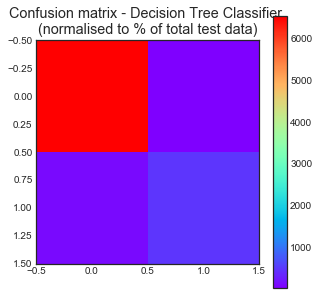

In [110]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print ('Best score: %0.3f' % grid_search.best_score_)

print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid_search.predict(X_test)
plotCM(Y_test, predictions)

Decision tree train/test accuracies 0.976/0.977
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      6609
          1       0.82      0.89      0.85       551

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6504  105]
 [  62  489]]


NameError: name 'n_classes' is not defined

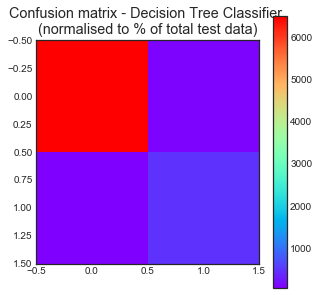

In [111]:
# Leveraging weak learners via Adaptive Boosting

from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train, Y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(Y_train, y_train_pred)
tree_test = accuracy_score(Y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))
plotCM(y_test_pred,Y_test)

AdaBoost train/test accuracies 0.979/0.980
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      6640
          1       0.82      0.93      0.87       520

avg / total       0.98      0.98      0.98      7160

Confusion matrix
[[6531  109]
 [  35  485]]


NameError: name 'n_classes' is not defined

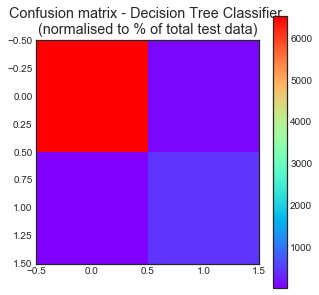

In [113]:
ada = ada.fit(X_train, Y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(Y_train, y_train_pred) 
ada_test = accuracy_score(Y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))
plotCM(y_test_pred,Y_test)